<a href="https://colab.research.google.com/github/rrvenkatrama/python-data-analysis/blob/main/Rajesh_Ramani_Advanced_Python_Data_Analysis_Project_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Report

## Rajesh Ramani 



# Introduction

This research focuses on evaluating various automobiles with different specifications, body styles, brands, and engines, and how these attributes or features influence their insurance profiles. In addition, the scope of the project includes exploring correlations between some of these features. The goal is to provide high-level guidance to potential car buyers and set expectations on how certain features they choose could lead to different insurance profiles (such as risk factors and anticipated losses), which in turn may affect the insurance premium they might have to pay. The findings of this project are not recommendations but rather serve as indicators or pointers.

## About Data

### 1. Dataset

The dataset being utilized for this research is the Automobile dataset from the UCI ML Repository: https://archive.ics.uci.edu/dataset/10/automobile

This data set is collected from 1985 Ward's Automotive Yearbook, which is a book of automobile statistics.

### 2. Citation
Schlimmer, J. (1985). Automobile [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.

### 3. What the dataset represents (cases/features)

The dataset contains, for various car makes,  models and configurations the following:


* The make and model of the car
* The technical specs for the car
* Normalized insurance losses information (average insurance claims per dollar value of the car per year)
* Symboling (adjusted risk factors for insurance purposes)
* Price of the particular configuration

There may be multiple rows for the same make and model, identifying data for various unique configurations.

Each row also represents insurance risk data for a specific make, model and a configuration  (number of cyl, fuel type, aspiration, number of doors, body-style, drive wheels, engine types, cylinders etc)

### 4. Why this data set ?
This interesting dataset has a robust set of multivariate features (26) and enough data samples (205) for data analysis.  There are lots of interesting variables and their relations to study. This data set also appears to be conducive for linear regression.

### 5. Description of the data
**The data has 11 categorical values:**

Symboling (ordinal categorical), make,	fuel-type,	aspiration,	num-of-doors,	body-style,	drive-wheels,	engine-location, engine-type,	num-of-cylinders and fuel-system

**The data has 15 continuous variables:**
symboling, normalized-losses,   wheel-base,	length,	width,	height,	curb-weight,  bore,	stroke,	compression-ratio,	horsepower,	peak-rpm,	city-mpg,	highway-mpg,	price and engine-size

### 6. Variables I will be studying

Out of the 26 varibales, the ones I am currently interested in studying are:



* Make and Model
* Normalized losses
* Symboling
* Horsepower
* Mileage
* Vehicle price
* Body style
* Number of cylinders
* Drive-type (RWD/4WD/FWD etc)



### 7. Type of study

This is an observational study because data was collected from real world observations and presented as is, without any manipulation of features or variables.

### 8. Data quality checks (missing values/outliers)

1. About 20% of the datapoints don't have the normalied losses values.
2. A small number of data points don't have price populated.
3. (3) out of (205) datapoints (pertaining to Porsche) have engine in the rear. All the other datapoints/vehicles have engines in the front.

**Action: Removing datapoints that have null values for normalized-losses. **

## Exploratory Data Analysis questions covered

### Exploratory data analysis questions I would like answered from the data


1. Do the number of cylinders have an effect on normalized insurance losses ?

This is to understand if people driving certain types of vehicles 4-cyl vs 6-cyl vs 8-cyl cause more accidents which will indicate more spirited driving or rash driving.

2. Is there a relation between symboling (higher risk factor assigned by insurance companies resulting in higher insurance premium) and horse power of the vehicle ?

This is again to see if there is a correlation between the size and power of the engine to the risk factor which might indicate driving patterns differ depending on these variables.


3. How does the combined city and hwy mpg affect normalized losses ?

This is to confirm if people opting for good mileage vehicles generally drive safer.


4. Do number of cylinders affect curb weight ?

Does having more cylinders mean more parts and therefore heavier vehicles ?

## Inference questions

1. **Is there a statistically significant difference in the mean normalized losses between sedans and non-sedans in the population ?**

This question is important to understand whether sedans are generally safer vehicles from an insurance standpoint versus convertibles or coupes and may help make decisions for buyers who may want to reduce insurance premiums as premiums could be directly tied to normalized losses for a specific body style type.

I would like to apply **hypothesis testing** (two-sample t-test)  to try and answer this question.

I will be evaluating the normalized losses of two populations: Sedans vs Non Sedans from the sample data and test the following hypothesis:

Mean normalized losses for both sedan population and non-sedan population are the same.

μ-sedan - μ-non-sedans = 0

I will apply applicable hypothesis  techniques for inference on the difference in means of two normal distributions, variances unknown (Hypotheses tests on the difference in means, variances unknown). I will split the data set into two independent sample sets (sedan and non-sedans).   

2. **Is there a statistically significant linear relationship between a vehicle’s horsepower and its normalized losses in the population, so that horsepower could be used to predict normalized losses ?**

This is also a key question that will help decide if buying more powerful vehicles also mean higher insurance premiums. Fitting a linear model if a relationship exists also will help predict normalized losses (and thus insurance premiums) given a certain horse power of a car.

# Data loading and cleanup

## Data Loading from source

In [ ]:


!pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)



{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

# Data Cleanup

## Remove rows with NaN normalized-losses

In [ ]:
## Cleanup data point with null normalized-values
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from scipy import stats

autodata = automobile.data.original.copy()

autodata = autodata.dropna(subset=['normalized-losses'])
autodata.shape

(164, 26)

In [ ]:
pd.set_option('display.max_columns', 40)
autodata.head(100)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0,2
6,158.0,audi,gas,std,4.0,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0,1
8,158.0,audi,gas,turbo,4.0,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0,1
10,192.0,bmw,gas,std,2.0,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,4,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,186.0,porsche,gas,std,2.0,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,4,151,mpfi,3.94,3.11,9.50,143.0,5500.0,19,27,22018.0,3
132,150.0,saab,gas,std,2.0,hatchback,fwd,front,99.1,186.6,66.5,56.1,2658,ohc,4,121,mpfi,3.54,3.07,9.31,110.0,5250.0,21,28,11850.0,3
133,104.0,saab,gas,std,4.0,sedan,fwd,front,99.1,186.6,66.5,56.1,2695,ohc,4,121,mpfi,3.54,3.07,9.30,110.0,5250.0,21,28,12170.0,2
134,150.0,saab,gas,std,2.0,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,4,121,mpfi,2.54,2.07,9.30,110.0,5250.0,21,28,15040.0,3


# Perform Exploratory Data Analysis

## 1. Do the number of cylinders have an effect on Normalied insurance losses ?

## Summary stats for Normalized-Losses by number of cylinders

In [ ]:



autodata.groupby('num-of-cylinders')['normalized-losses'].describe()



,count,mean,std,min,25%,50%,75%,max
num-of-cylinders,,,,,,,,
2,4.0,150.000000,0.000000,150.0,150.0,150.0,150.0,150.0
3,1.0,121.000000,NaN,121.0,121.0,121.0,121.0,121.0
4,137.0,117.773723,32.697138,65.0,94.0,110.0,137.0,256.0
5,7.0,121.714286,35.868809,93.0,93.0,93.0,158.0,164.0
6,14.0,154.142857,48.978578,90.0,108.0,166.5,194.0,231.0
8,1.0,142.000000,NaN,142.0,142.0,142.0,142.0,142.0


### **Conclusion:** From the summary stats it doesn't look like there is any corelation or linearity between cylinders and normalized losses as you can see 2 cylinders have the highest mean normalized losses and 6 cylinders have higher normalized losses than 8-cylinders and 4 cylinders have lower normalized losses than 6.

##  Is there a relation between symboling (higher risk factor assigned by insurance companies resulting in higher insurance premium) and horse power of the vehicle ?

In [ ]:
autodata['horsepower_binned'] = pd.cut(autodata['horsepower'], bins=7)
autodata.groupby('horsepower_binned')['symboling'].describe()

<ipython-input-82-e61e41685dc3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  autodata.groupby('horsepower_binned')['symboling'].describe()


,count,mean,std,min,25%,50%,75%,max
horsepower_binned,,,,,,,,
"(47.848, 69.714]",42.0,1.119048,0.592736,0.0,1.00,1.0,1.0,2.0
"(69.714, 91.429]",40.0,0.600000,1.007663,-1.0,0.00,0.0,1.0,3.0
"(91.429, 113.143]",37.0,0.756757,1.256216,-1.0,0.00,0.0,2.0,3.0
"(113.143, 134.857]",24.0,0.208333,1.531670,-2.0,-1.00,0.0,2.0,3.0
"(134.857, 156.571]",10.0,1.200000,1.619328,-1.0,0.00,0.5,3.0,3.0
"(156.571, 178.286]",10.0,1.100000,1.969207,-2.0,-0.75,1.5,3.0,3.0
"(178.286, 200.0]",1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0


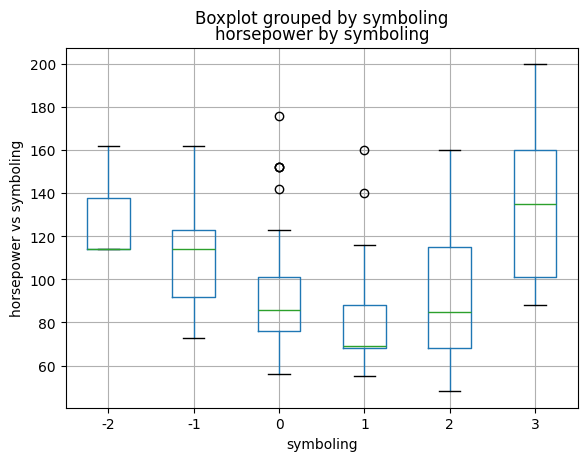

In [ ]:

autodata.boxplot(column='horsepower', by='symboling',  showfliers=True,
              meanprops=dict(marker='o', color='red', markersize=7))

#
#b_summary_weekday.plot(kind='bar', color='skyblue')

plot.title('horsepower by symboling')
plot.xlabel('symboling')
plot.ylabel('horsepower vs symboling')
#plot.xticks(ticks=range(1,8), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat' ])

# Show the plot
plot.show()

### **Conclusion:** Symboling (risk factor) appears to be average (0 or 1) for cars with lower horsepower range however on ether side of 0 there are cars with higher mean horsepower both in the high risk and low risk category.  No true correlaion can be found.

## How does the combined city and hwy mpg affect normalized losses ?



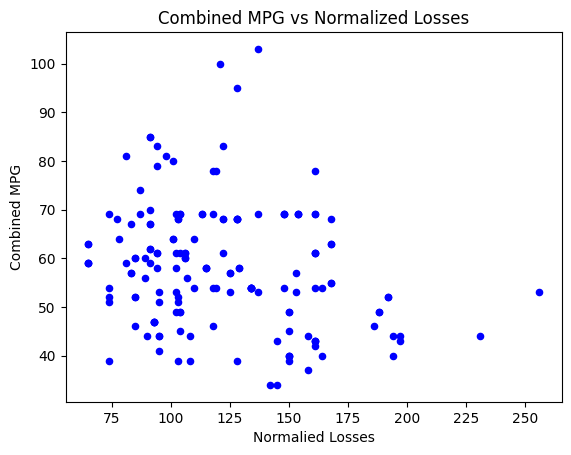

In [ ]:

autodata['combined-mpg'] = autodata['city-mpg'] + autodata['highway-mpg']

autodata.plot(x='normalized-losses', y='combined-mpg', kind='scatter', color='blue',  marker='o')

plot.title('Combined MPG vs Normalized Losses')
plot.xlabel('Normalied Losses')
plot.ylabel('Combined MPG')


# Show the plot
plot.show()

### Conclusion: There doesn't seem to be any linear pattern betweeen Combined MPG and normalized losses...

##  Do number of cylinders affect curb weight ?

In [ ]:
autodata.groupby('num-of-cylinders')['curb-weight'].describe()

,count,mean,std,min,25%,50%,75%,max
num-of-cylinders,,,,,,,,
2,4.0,2411.250000,59.213596,2380.0,2380.0,2382.5,2413.75,2500.0
3,1.0,1488.000000,NaN,1488.0,1488.0,1488.0,1488.00,1488.0
4,137.0,2345.708029,372.825857,1713.0,2024.0,2290.0,2535.00,3252.0
5,7.0,3326.285714,404.788304,2824.0,2965.0,3495.0,3632.50,3770.0
6,14.0,3120.928571,313.797942,2710.0,3013.0,3083.0,3139.00,4066.0
8,1.0,3685.000000,NaN,3685.0,3685.0,3685.0,3685.00,3685.0


## **Conclusion:**  There does appear to be a linearity between number of cylinders and curb weight but the data appears to be insufficient to conclude (some cylinders have less than 10 records)...

# Perform Inference #1 on population - Using Hypothesis testing (mean normalized losses are the same for sedans and non-sedans)

### **Inference Question** Is there a statistically significant difference in the mean normalized losses between sedans and non-sedans in the population ?

**Assumptions:**

1.   The population's normalised losses for both sedans and non-sedans are normally distributed.  
2.   Variances for normalized losses for both sedans and non-sedans are unknown but assumed to be the same.
3. σ1 = Population's unknown variance for normalized losses for sedans and
σ2 = Population's unknown variance for normalized losses for non-sedans.
4. S1 = Sample variance for sedans.
S2 = Sample variance for non-sedans.
5.  X̄1 = sample mean of normalized losses for sedans and
X̄2 = sample mean of normalized losses for non-sedans.
6. μ1 (μ-sedan) = population mean (unknown) of normalized losses for sedans.
μ2 (μ-non-sedans) = population mean (unknown) of normalized losses for non-sedans.
7. E(X̄1 - X̄2) = μ1 - μ2
8. Alpha (α) = 0.05


**Sample data:**  We will extract two sample sets from the data by dividing the data frame into sedans and non-sedans before performing the hypothesis testing

**Null Hypothesis:** Mean normalized losses are the same for sedans and non-sedans.

i.e. µ-sedans - µ-non-sedans = 0 (i.e. μ1 - μ2 = 0)

**Alternative Hypothesis:** µ-sedans - µ-non-sedans != 0 (μ1 - μ2 != 0)...


In [ ]:
# Split automata into two data frames based on body-style column value of 'sedan' and !'sedan'


sedan_df = autodata[autodata['body-style'] == 'sedan']
non_sedan_df = autodata[autodata['body-style'] != 'sedan']


In [ ]:
# Display the total rows in sedan_df and non_sedan_df (sample sizes)

print("Total sedans in the data n1: ", len(sedan_df))
print("Total non-sedans in the data n2: ", len(non_sedan_df))


Total sedans in the data n1:  80
Total non-sedans in the data n2:  84


In [ ]:
# Calculate the sample means of normalized losses for sedans and non-sedans
X1 = sedan_df['normalized-losses'].mean()
X2 = non_sedan_df['normalized-losses'].mean()

print(f"Mean normalized losses for sedans: {X1}")
print(f"Mean normalized losses for non-sedans: {X2}")


Mean normalized losses for sedans: 120.7
Mean normalized losses for non-sedans: 123.23809523809524


In [ ]:
# Calculate the sample standard deviations of normalized losses for sedans and non-sedans
S1 = sedan_df['normalized-losses'].std()
S2 = non_sedan_df['normalized-losses'].std()

print(f"Standard deviation of normalized losses for sedans: {S1}")
print(f"Standard deviation of normalized losses for non-sedans: {S2}")


Standard deviation of normalized losses for sedans: 31.665738383018518
Standard deviation of normalized losses for non-sedans: 38.84991791020123


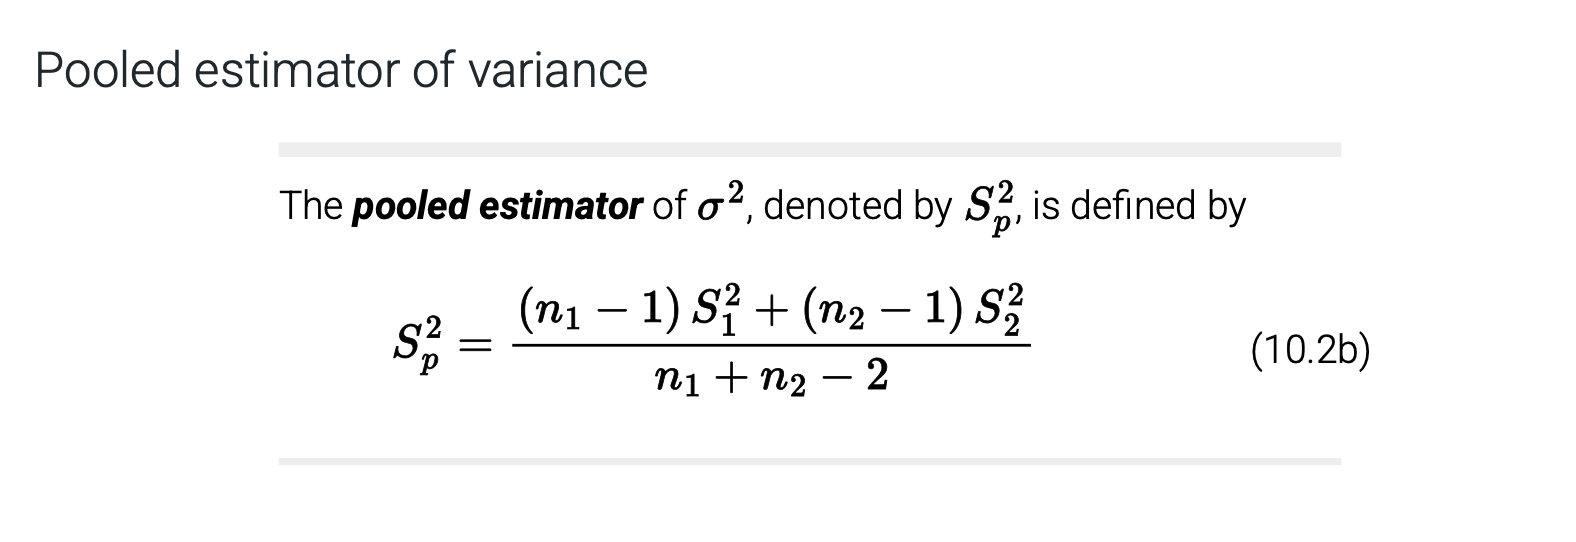

In [ ]:
# Calculate pooled estimation of variance of normalized losses for the two samples



n1 = len(sedan_df)
n2 = len(non_sedan_df)


S1 = np.var(sedan_df['normalized-losses'], ddof=1)  # Sample variance
S2 = np.var(non_sedan_df['normalized-losses'], ddof=1)

print ("S1: ", S1)
print ("S2: ", S2)

# Calculate the pooled variance (Sp)
Sp = ((n1-1)*S1+(n2-1)*S2)/(n1+n2 - 2)

print("Pooled variance Sp:", Sp)




S1:  1002.7189873417722
S2:  1509.3161216293743
Pooled variance Sp: 1262.271840094062


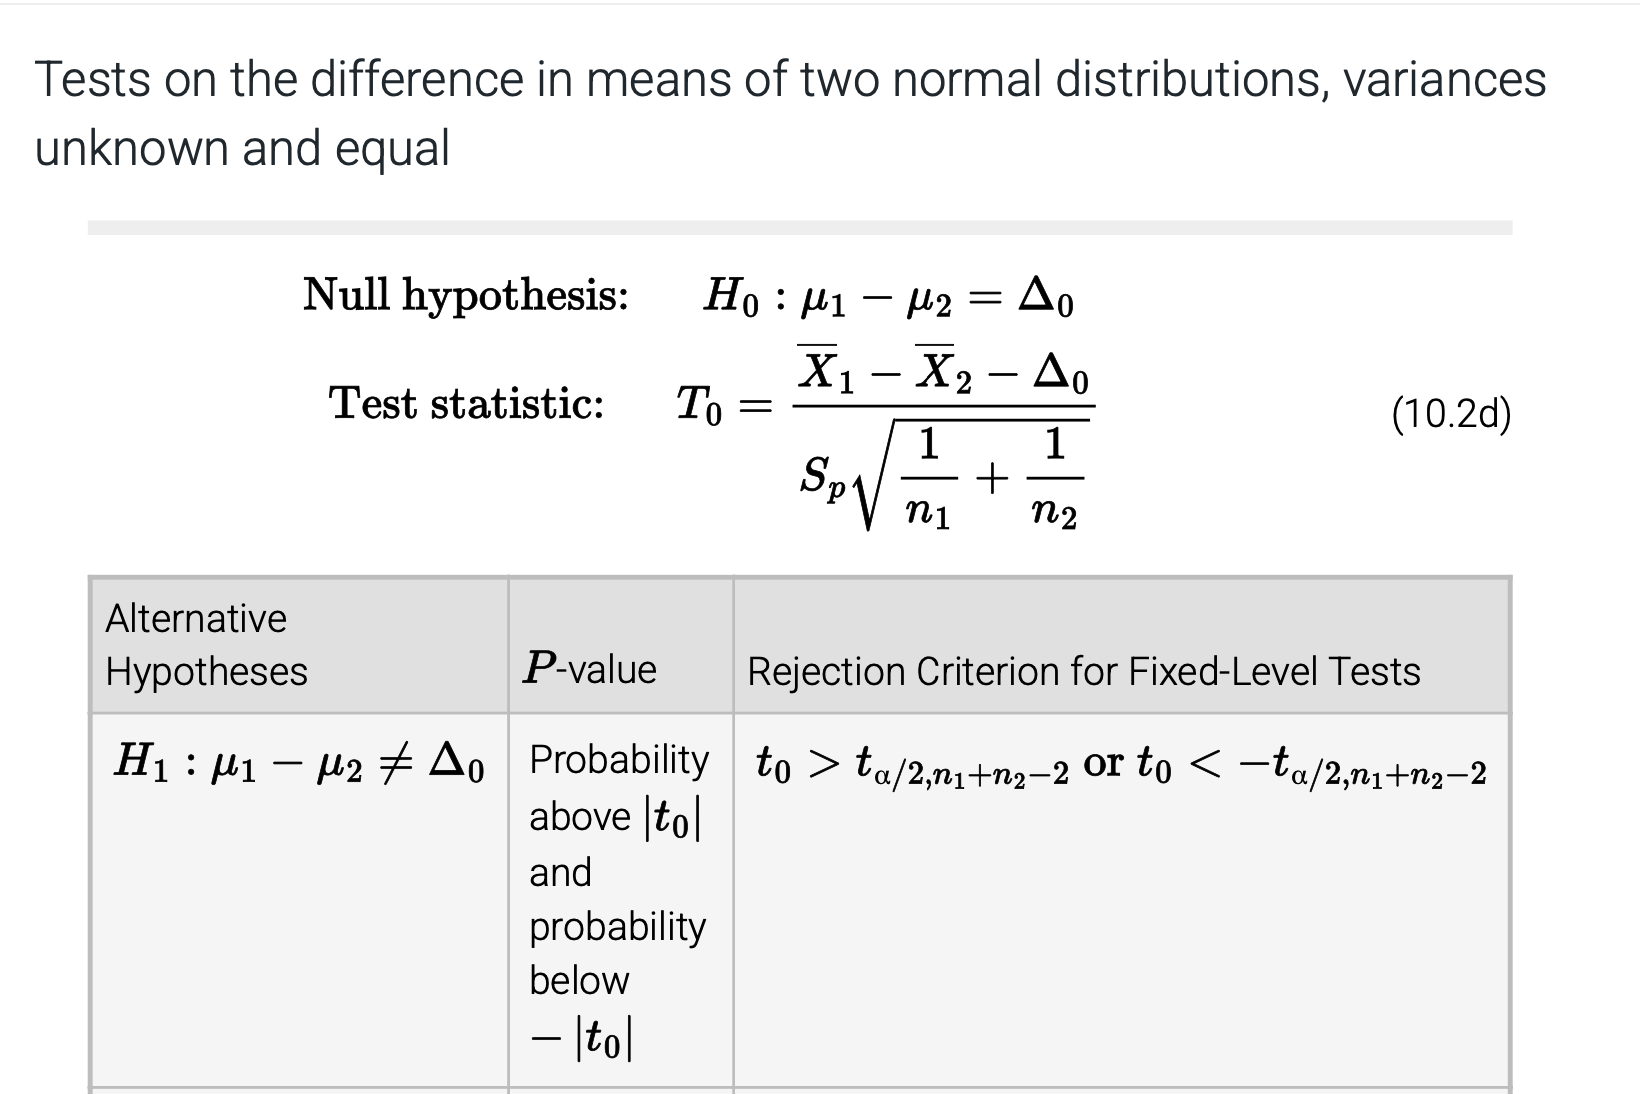

In [ ]:
# Calculate the value of t0

t0 = (X1 - X2 - 0)/(Sp*np.sqrt(1/n1 + 1/n2))

print(f"t0 value: {t0}")


t0 value: -0.012871161306944254


In [ ]:
# Calculate  t-value for alpha/2=0.025, n1+n2-2



alpha_div_2 = 0.025
degrees_of_freedom = n1 + n2 - 2

t_value = stats.t.ppf(1 - alpha_div_2, degrees_of_freedom)

print(f"t-value (right cut off) for alpha/2 = {alpha_div_2} and df = {degrees_of_freedom}: {t_value}")
print(f"t-value (left cut off) for -alpha/2 = {alpha_div_2} and df = {degrees_of_freedom}: {-t_value}")


t-value (right cut off) for alpha/2 = 0.025 and df = 162: 1.9747157859171878
t-value (left cut off) for -alpha/2 = 0.025 and df = 162: -1.9747157859171878


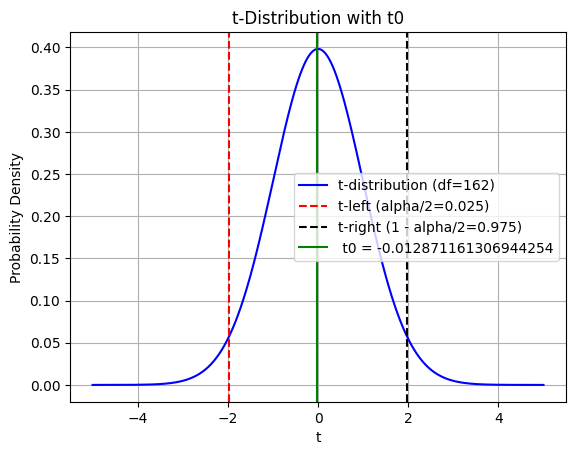

In [ ]:

# Plot the t-distribution

x = np.linspace(-5, 5, 500)
y = stats.t.pdf(x, degrees_of_freedom)

plot.plot(x, y, label=f't-distribution (df={degrees_of_freedom})', color='blue')
plot.axvline(stats.t.ppf(alpha_div_2, degrees_of_freedom), color='red', linestyle='--', label=f't-left (alpha/2={alpha_div_2}) ')
plot.axvline(stats.t.ppf(1 - alpha_div_2, degrees_of_freedom), color='black', linestyle='--', label=f't-right (1 - alpha/2={1 - alpha_div_2}) ')
plot.axvline(t0, color='green', linestyle='-', label=f' t0 = {t0}')
plot.title("t-Distribution with t0")
plot.xlabel("t")
plot.ylabel("Probability Density")
plot.legend()
plot.grid(True)
plot.show()

## Conclusion

Since t0 is between -t-alpha and t-alpha, the rejection criterion is not met and therefore the null hypothesis is **not rejected**.

Please note the sample size is > 40 for both samples I could have assumed S1 and S1 are approximately σ1 and σ2 (references to 10.1 and bneginning of 10.2 in the textbook) but choose to follow the variance unknown method for academic puposes.

# Perform inference #2 on the population - using linear regression (horsepower vs normalized losses)  

### **Inference Question:** Is there a statistically significant linear relationship between a vehicle’s horsepower and its normalized losses in the population, so that horsepower could be used to predict normalized losses ?

### 1. First scatter plot to see if there is a linear relation, y = normalized losses and x = horse power.

### 2. Use linear regression to find the slope and intercept 𝞫0 and 𝞫1 using least square method manually (without using statsmodel.api first) and plot the fitted line.

### 3. (a) Double check the coefficients by fitting a line using statsmodel.api and verifying the cooefficients obtained are the same  (b) print a summary,  (c) plot the residuals against predicted y values, (d) plot the  distribution of residuals to see if it is normal.

### 4. Interpretation:  R^2, Adjusted R2, P-Value, distrbution of validate null Hypothesis H0: 𝞫1 = 0, H1: 𝞫1 != 0




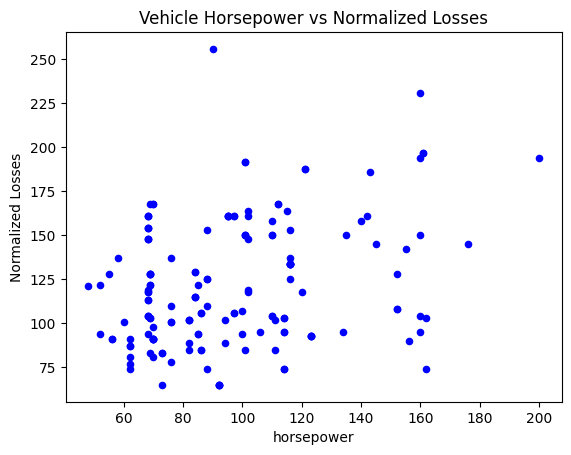

In [ ]:
# Check for visual linear pattern

autodata.plot(x='horsepower', y='normalized-losses', kind='scatter', color='blue',  marker='o')

plot.title('Vehicle Horsepower vs Normalized Losses')
plot.xlabel('horsepower')
plot.ylabel('Normalized Losses')


# Show the plot
plot.show()

### Conclusion:  There appears to be a linear pattern between horsepower an Normalized losses though the variances appear to be large. We may attempt to use linear regression.

## We will use least squares estimate method to find the coefficients and fit a line


In [ ]:

x = np.array(autodata['horsepower'])
y = np.array(autodata['normalized-losses'])


# Calculate the mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

n=len(x)

B1 = (np.sum(x*y) - ((np.sum(x)*np.sum(y))/n))/(np.sum(x**2) - ((np.sum(x)**2)/n))
B0 = mean_y - (B1*mean_x)

print("Coefficient B1: ", B1)
print("Coefficient B0: ", B0)

y_pred = B0 + B1*x


Coefficient B1:  0.34473183798217416
Coefficient B0:  88.83427475803205


## Validation and Interpretation

### Plot the fitted line

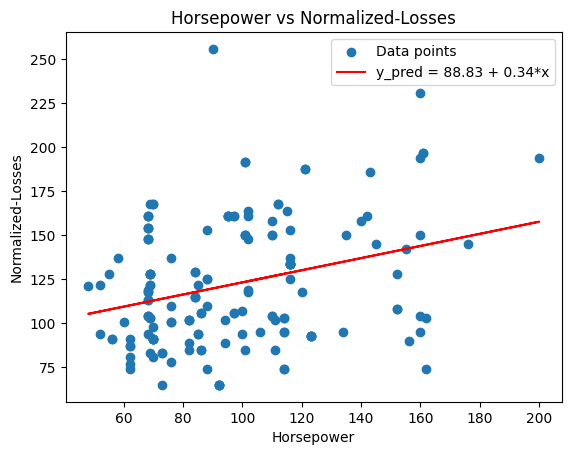

In [ ]:

# Plot the scatter plot again showing the fitted line in red

plot.scatter(x, y, label='Data points')
# Add the linear regression line
plot.plot(x, y_pred, color='red', label=f'y_pred = {B0:.2f} + {B1:.2f}*x')
plot.xlabel('Horsepower')
plot.ylabel('Normalized-Losses')
plot.title('Horsepower vs Normalized-Losses')
plot.legend()
plot.show()

### Plot the residuals against predicted values

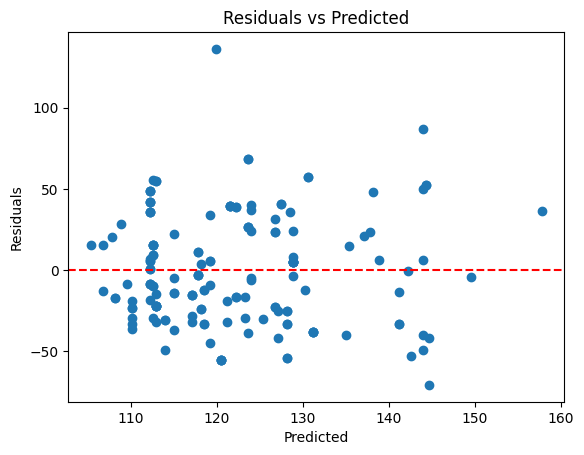

In [ ]:
# plot residuals
R = y - y_pred

plot.scatter(y_pred, R)
plot.axhline(0, color='red', linestyle='--')
plot.xlabel('Predicted')
plot.ylabel('Residuals')
plot.title('Residuals vs Predicted')
plot.show()

### Verify fit using statsmodels.api and show the model summary

In [ ]:

import statsmodels.api as sm


X = autodata['horsepower']
y = autodata['normalized-losses']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_with_const).fit()

# Summary of regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized-losses   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     15.53
Date:                Fri, 09 May 2025   Prob (F-statistic):           0.000120
Time:                        23:33:19   Log-Likelihood:                -809.83
No. Observations:                 164   AIC:                             1624.
Df Residuals:                     162   BIC:                             1630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.8343      8.824     10.068      0.0

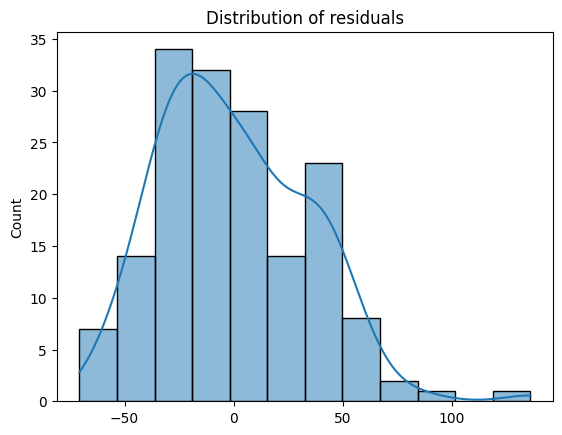

In [ ]:
# Check the distrbution of residuals to see it it is normal

import seaborn as sb

sb.histplot(R, kde=True)
plot.title('Distribution of residuals')
plot.show()


## Validation results

1. The coeeffients obtained using statsmodels.api matche the coefficients obtained using least squares method (this is merely a code validation).

2. (Visual) The fitted line (red) is visually in between the data points.

3. The residuals appear to be approximately normally distributed.

## Interpretation

1. R^2 and Adjusted R^2 are quite small indicating horesepower influences only about 8.7% of variations in normalized losses which means horsepower alone is not a strong predictor of normalized losses.

2. P-values < 0.05 means however there is statistical significance between horsepower and normalized-losses and we can reject the null hypothesis.

3. B1 or 0.34 means for every additional horsepower, normalized losses go up by 0.34.

4. In conclusion though there is statistical significance between horsepower and normalized-losses, likely other features in combination will influcence the normalized-losses (as indicated by small values of R^2 and adjusted R^2).


#Overall Conclusions about the research



To summarize, the research focused on whether specific characteristics of vehicles influenced normalized losses for insurance directly, and therefore premiums indirectly.

Based on the data analysis, I was able to learn and conclude that certain vehicle characteristics do influence the insurance profile. The limitations, however, were the age of the data (from 1985) and the small volume of the sample (about 160 rows).

For further research, one suggestion could be to gather more recent data from the last 1–2 decades and include advanced features like traction control systems, lane departure monitoring, cross-traffic alerts, and other modern safety technologies, and study how they influence insurance profiles.
The research also selectively studied a few features, and there could be multiple significant relationships between other features that may be worth exploring further.